<a href="https://colab.research.google.com/github/yunions/Statistics/blob/master/Chap10_%ED%86%B5%EA%B3%84%EC%A0%81_%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/yunions/Statistics.git

Cloning into 'Statistics'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 78 (delta 28), reused 31 (delta 4), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

# 10. 통계적 추정

In [3]:
df = pd.read_csv('/content/Statistics/data/ch4_scores400.csv')
scores = np.array(df['score'])

In [4]:
p_mean = np.mean(scores)
p_var = np.var(scores)
#모평균, 모분산
p_mean, p_var

(69.530, 206.669)

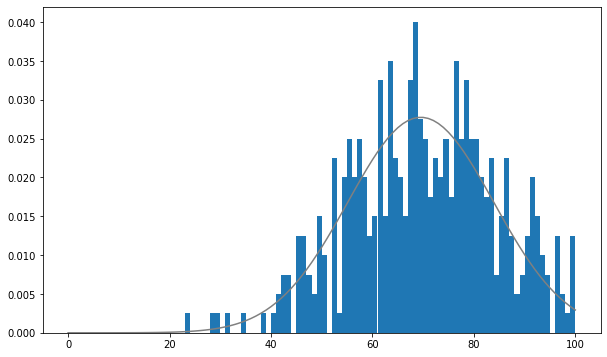

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [6]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [7]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 10.1 점추정
**점추정**</br>
: 모평균이나 모분산 등의 모수를 하나의 수치로 추정하는 것

### 10.1.1 모평균의 점추정

In [8]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}, 데이터 : {samples[i]}') #표본을 추출할 때마다, 표본평균은 달라짐

1번째 표본평균: 67.000, 데이터 : [68 75 91 60 76 70 59 56 77 54 77 60 67 86 70 54 52 72 57 59]
2번째 표본평균: 72.850, 데이터 : [97 55 61 89 80 85 70 67 77 81 48 67 56 74 94 64 83 65 73 71]
3번째 표본평균: 69.200, 데이터 : [78 67 43 63 79 46 89 79 86 85 70 57 55 63 49 83 83 76 62 71]
4번째 표본평균: 64.450, 데이터 : [74 62 48 73 45 67 58 83 49 83 67 59 66 52 54 53 78 80 81 57]
5번째 표본평균: 72.650, 데이터 : [63 83 67 75 74 73 77 78 66 86 82 67 78 54 65 92 64 91 61 57]


*   추정량이 필요한 성질(1)

**불편성(unbiasedness)** : 추정량의 기댓값이 추측하려는 모수가 되는 성질</br>
**불편추정량(unbiased estimator)** : 불편성을 가진 추정량</br></br>

In [9]:
#bar X의 평균이 모평균인 것을 대수의 법칙을 통해 확인
sample_means = np.mean(samples, axis=1)
print(f'n = {len(samples[0])}인 {len(samples)}개의 샘플데이터의 표본평균 : {np.mean(sample_means) : .3f}',
      f'\n모평균 : {p_mean}')

n = 20인 10000개의 샘플데이터의 표본평균 :  69.538 
모평균 : 69.53


*   추정량이 필요한 성질(2)

**일치성(consistency)** : 표본크기 n을 증가시키면 추측하길 원하는 모수에 수렴하는 성징</br>
**일치추정량(cosistent estimator)** : 일치성을 지닌 추정량

In [10]:
np.mean(np.random.choice(scores, int(1e6))) #표본크기 n=1000000일 때, bar X

69.543

In [11]:
s_mean = np.mean(sample)
print(f'A학생이 뽑은 {sample} 의 평균 : {s_mean}')

A학생이 뽑은 [49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81] 의 평균 : 70.4


### 10.1.2 모분산의 점추정

In [12]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본평균: {s_var:.3f}, 데이터 : {samples[i]}')

1번째 표본평균: 116.800, 데이터 : [68 75 91 60 76 70 59 56 77 54 77 60 67 86 70 54 52 72 57 59]
2번째 표본평균: 162.928, 데이터 : [97 55 61 89 80 85 70 67 77 81 48 67 56 74 94 64 83 65 73 71]
3번째 표본평균: 187.060, 데이터 : [78 67 43 63 79 46 89 79 86 85 70 57 55 63 49 83 83 76 62 71]
4번째 표본평균: 149.148, 데이터 : [74 62 48 73 45 67 58 83 49 83 67 59 66 52 54 53 78 80 81 57]
5번째 표본평균: 111.528, 데이터 : [63 83 67 75 74 73 77 78 66 86 82 67 78 54 65 92 64 91 61 57]


In [13]:
#표본분산이 모분산이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1)
print(f'n = {len(samples[0])}인 {len(samples)}개의 샘플데이터의 표본평균 : {np.mean(sample_vars) : .3f}',
      f'\n모평균 : {p_var}')

n = 20인 10000개의 샘플데이터의 표본평균 :  196.344 
모평균 : 206.6691


*   모분산의 불편추정량

**불편분산(unbiased variance)**
$$s^2 = {1\over {n-1}}\sum_{i=1}^n(X_i - \overline{X})^2$$

In [14]:
sample_u_vars = np.var(samples, axis=1, ddof=1) #자유도 n-1지정
#sample_u_vars = np.var(np.random.choice(scores, int(1e6)), ddof=1) #n = 1000000으로 증가
print(f'n = {len(samples[0])}인 {len(samples)}개의 샘플데이터의 표본평균 : {np.mean(sample_u_vars) : .3f}',
      f'\n모평균 : {p_var}')

n = 20인 10000개의 샘플데이터의 표본평균 :  206.678 
모평균 : 206.6691


In [15]:
u_var = np.var(sample, ddof=1)
print(f'A학생이 뽑은 {sample} 의 분산 : {u_var}')

A학생이 뽑은 [49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81] 의 분산 : 158.25263157894742


## 10.2 구간추정

### 10.2.1 정규분포의 모평균 구간 추정 : 모분산을 알고 있는 경우
: 모집단을 정규분포로 가정하고, 모분산을 알고 있는 경우</br>
**표준오차(standard error)** : 추정량의 표준편차
- CI : $X_1, X_2, ..., X_n\;\sim \; N(\mu,\sigma^2)$일 때, 모분산 $\sigma^2$를 알고있다면, 신뢰수준 $100(1-\alpha)%$인 신뢰구간
$$\left[\;\overline{X} - z_{\alpha/2}\sqrt{\sigma^2 \over n},\;\; \overline{X} - z_{1-\alpha/2}\sqrt{\sigma^2 \over n}\;\;\right]$$

In [16]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n) #lower confidence limit
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n) #upper confidence limit

lcl, ucl

(64.100, 76.700)

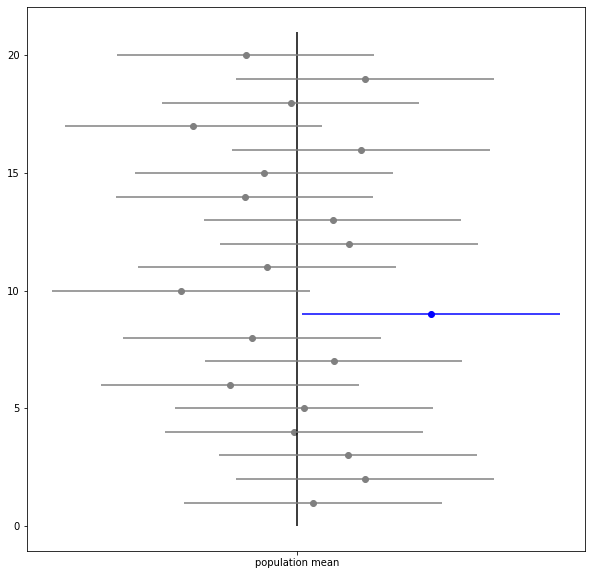

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else: #CI 범위 밖인 경우
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [18]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n) # rv.is(0.025)f = 2.5%가 되는 z값
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples) #95.1%가 신뢰구간 안에 있음

0.951

### 10.2.2 정규분포의 모분산(평균을 알지 못하는) 구간추정
모분산의 구간 추정 = $P(* \le \sigma^2 \le *) = 0.95$ → 분산의 추정 = 카이제곱</br>
불편분산 $s^2$을 변환
$$Y = {(n-1)s^2 \over \sigma^2}, \qquad Y \sim \chi^2(n-1)$$
- CI : $X_1, X_2, ..., X_n\;\sim \; N(\mu,\sigma^2)$일 때, 모평균이 알려져 있지 않을 때, $100(1-\alpha)%$의 신뢰구간
$$\left[\;\;{(n-1)\sigma^2 \over \chi^2_{\alpha/2}(n-1)},\;\; {(n-1)\sigma^2 \over \chi^2_{1-\alpha/2}(n-1)}\;\;\right]$$

In [19]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

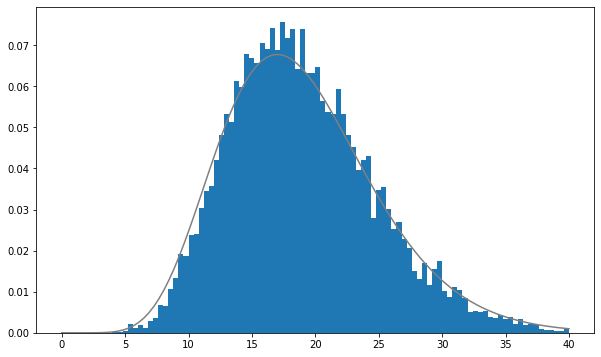

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [21]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.525, 337.596)

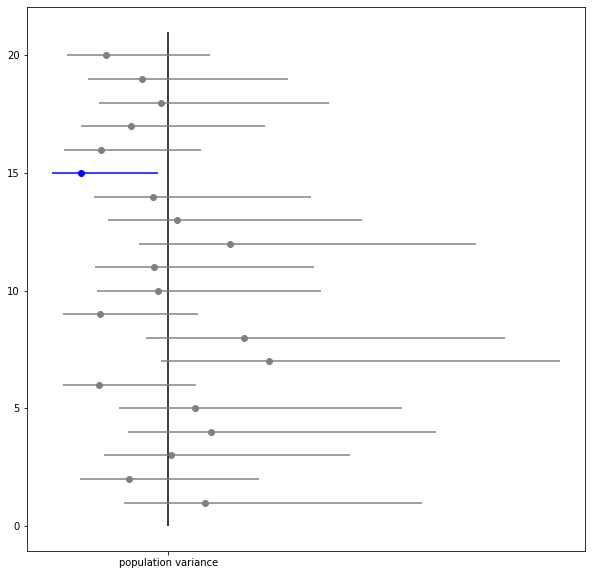

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [23]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964

### 10.2.3 정규분포의 모평균(모분산을 알지 못하는) 구간추정

In [24]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.512, 76.288)

### 10.2.4 베르누이 분포의 모평균의 구간추정

In [25]:
enquete_df = pd.read_csv('/content/Statistics/data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [26]:
s_mean = enquete.mean()
s_mean

0.709

In [27]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.681, 0.737)

###10.2.5 포아송 분포의 모평균의 구간추정

In [28]:
n_access_df = pd.read_csv('/content/Statistics/data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [29]:
s_mean = n_access.mean()
s_mean

10.444

In [30]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.698, 11.191)

<img src ='https://github.com/yunions/Statistics/blob/master/image/confidence_interval.PNG?raw=true'>